# 📊 Natural Gas Price Forecasting

A project completed as part of the J.P. Morgan Quantitative Research Virtual Experience Program. This notebook demonstrates time series forecasting of natural gas prices using monthly trends to support storage contract pricing.


##  Objective

You are tasked with helping a commodity trading desk estimate natural gas prices by analyzing historical market data. Your goal is to:

- Visualize the price data from October 2020 to September 2024.
- Identify seasonal patterns.
- Extrapolate price data one year beyond the last known point.
- Build a function that estimates the gas price on any date.


##  Step 1: Load and Inspect the Data

We begin by reading the monthly price data from a CSV file. Each entry represents the market price of natural gas at the end of a month.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Nat_Gas.csv")

# Display the first few rows
df.head()


,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


##  Step 2: Parse Dates and Visualize Price Trends

Next, we convert the date column to datetime format and plot the historical prices to uncover trends or seasonal patterns.


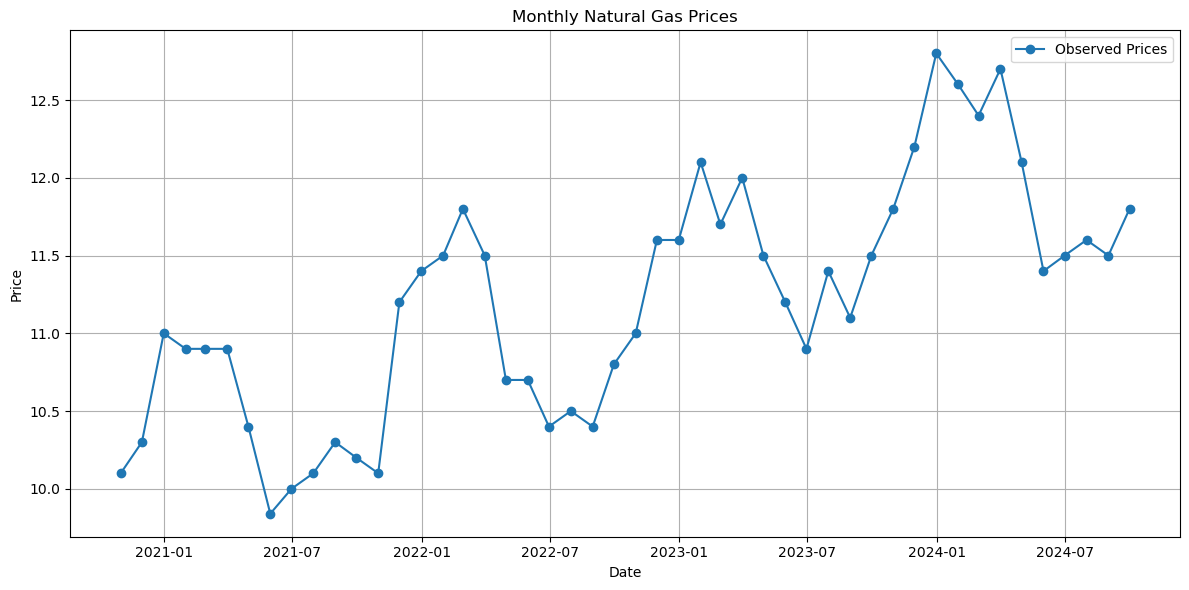

In [6]:
from pandas.tseries.offsets import DateOffset
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Convert 'Dates' to datetime and set as index
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)

# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], marker='o', label='Observed Prices')
plt.title('Monthly Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



###  Historical Price Plot

This line plot shows the monthly closing prices of natural gas from **October 2020 to September 2024**. You can observe general price fluctuations, including:
- Seasonal spikes and drops.
- Overall volatility depending on the time of year.
This visualization helps reveal underlying seasonal patterns which will inform our price forecasting model.


##  Step 3: Forecast the Next 12 Months

We calculate the average price for each calendar month and use those seasonal patterns to estimate prices for the next 12 months.


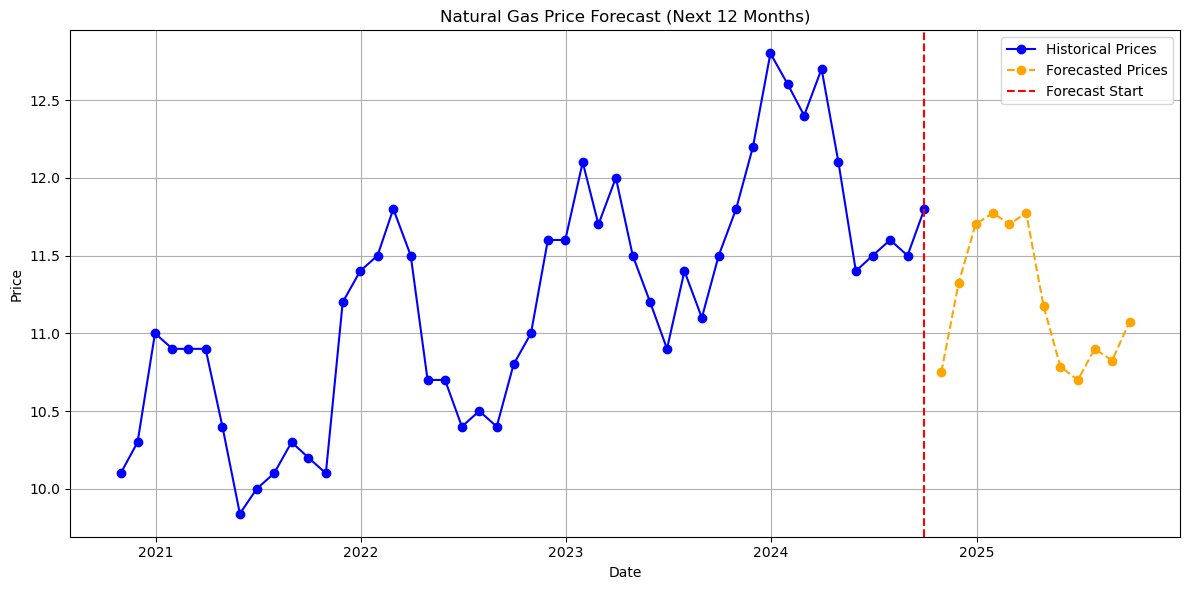

In [9]:
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import pandas as pd

# Build a simple extrapolation model based on monthly average
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Prices'].mean()

# Create future dates for next 12 months
last_date = df.index[-1]
future_dates = [last_date + DateOffset(months=i) for i in range(1, 13)]
future_months = [d.month for d in future_dates]
future_prices = [monthly_avg[month] for month in future_months]

# Build the future DataFrame
future_df = pd.DataFrame({'Prices': future_prices}, index=future_dates)

# Plot full range with clear distinction
plt.figure(figsize=(12, 6))

# Historical data (solid blue line)
plt.plot(df.index, df['Prices'], marker='o', color='blue', label='Historical Prices')

# Forecasted data (dashed orange line with dots)
plt.plot(future_df.index, future_df['Prices'], marker='o', linestyle='--', color='orange', label='Forecasted Prices')

# Vertical line at forecast start
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')

# Formatting
plt.title('Natural Gas Price Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Combine for later use in estimation
combined_df = pd.concat([df[['Prices']], future_df])



### Forecasted Price Plot

This plot shows the extrapolated natural gas prices for the next year based on historical monthly trends.

- **Blue Line & Dots**: Historical natural gas prices (Oct 2020 – Sep 2024).
- **Orange Dashed Line & Dots**: Forecasted prices for the next 12 months (Oct 2024 – Sep 2025), computed using the average monthly price pattern across previous years.
- **Red Vertical Line**: Marks the starting point of the forecast.

This simple seasonal extrapolation helps identify expected fluctuations due to month-specific behaviors—such as potential winter price surges or summer lulls. It offers stakeholders a quick approximation for pricing long-term contracts when market feed data is unavailable beyond 18 months.



## Step 4: Estimate Price by Any Date

We define a function that accepts any date (historical or future) and returns the estimated gas price. If the date is outside the observed range, the estimate is based on monthly seasonal averages.


In [12]:
from datetime import datetime

def estimate_price(date_input: str) -> float:
    """
    Estimate the price of natural gas for a given date string in 'YYYY-MM-DD' format.
    """
    try:
        input_date = pd.to_datetime(date_input)
        if input_date in combined_df.index:
            return float(combined_df.loc[input_date]['Prices'])
        else:
            # Estimate using monthly average
            return float(monthly_avg[input_date.month])
    except Exception as e:
        return f"Error: {e}"

# Example usage
estimate_price("2025-06-15")  # Mid-June 2025 (not in dataset, will use monthly average)


10.7

### Estimated Price Output

This output is generated by calling the `estimate_price()` function with a specific date.

- If the date exists in our dataset (historical or forecasted), it returns the corresponding price.
- If not, the function uses the average price of that month from all available years.

For example, an input of `"2025-06-15"` will return the average price for the month of June, allowing us to generate indicative prices for any storage period.
